In [3]:
%%javascript
var width = window.innerWidth || document.documentElement.clientWidth || document.body.clientWidth;
var height = window.innerHeight || document.documentElement.clientHeight || document.body.clientHeight;

IPython.notebook.kernel.execute("windowSize = (" + width + "," + height + ")");
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 2.5
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.0,
            color: "black"
        },
        "code": {
            "font-size": 1.6,
        },
        "pre": {
            "font-size": 1.6,
        }
    }
});

<IPython.core.display.Javascript object>

# Determining a Peptide's Sequence

<table style="border: none;"><tbody>
  <tr  style="border: none;">
  <td width="50%" style="border: none;">
      <ul>
      <li>From last time we learned that we can't always use DNA to resolve peptide/protein sequences</li>
      <li>What else can we do?</li>
        <ul>
        <li>Extract and purify a pure sample of the peptide/protein</li>
        <li>Try to resolve the peptide sequence by analyzing this sample</li>
        </ul>
      <li>Today's approach</li>
        <ul>
        <li>Randomly fracture the peptide</li>
        <li>Assemble an answer from the peices</li>
        </ul>
      </ul>
  </td>
  <td width="50%" style="border: none;">
  <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/BrokenVase.png" width="400px">
  </td>
</tbody></table>

<p style="text-align: right; clear: right; margin-right: 100px;">1</p>

# Molecular Weights are the Puzzle Peices

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/MassSpecFrac.png" width="700px" class="centerImg">

<p style="text-align: right; clear: right; margin-right: 100px;">2</p>

# Structure of a Peptide Chain

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/PeptideBonds.png" width="300px" style="float: right; clear: right; margin: 24px;">

* Peptides are chains of amino acids that are joined by *peptide* bonds
* These bonds reduce the weight of each amino acid by one H<sub>2</sub>0 molecule
* The result is called a *residue*
* A Mass Spectrograph can precisely measure the molecular weight (and charge and abundance) of any peptide chain
* Since the molecular weight of each of the possible 20 residues is known precisely, one can ask the question, which combination of residues would give a particular weight?
* The problem is ambiguous for the entire molecule
  - Consider all permulations of 'PIT': 
         'PIT', 'PTI', 'ITP', 'IPT', 'TPI', and 'TIP' all weigh the same
  - But they differ in their 2-peptide fragments: 
         'PIT' breaks into 'PI' and 'IT', while 
         'PTI' breaks into 'PT' and 'TI'

<p style="text-align: right; clear: right; margin-right: 100px;">3</p>

# An Simplified Peptide Weight table

* The actual molecular weight of an amino acid is a real number. This acounts for the relative abundances of atomic isotopes
* Today, we will use a simplified version that assumes only integer molecular weights
* Example:
<br><br>
  - Molecular weight of Glycine Amino Acid
  
    $$W(C_2 H_5 N O_2) = 12 \times 2 + 5 \times 1 + 14 + 16 \times 2 = 75$$<br>
    
  - Molecular wieght of Glycine Residue (Minus the $H_{2} O$ lost forming the peptide bond)
  
    $$W(C_2 H_5 N O_2 - H_2 O) = 57$$
    
    
* We can repeat this for all 20 Amino Acids to get a integer molecular weight table, which I call *Daltons*

<p style="text-align: right; clear: right; margin-right: 100px;">4</p>

# Table Definitions

In [4]:
AminoAcid = {
    'A': 'Alanine', 'C': 'Cysteine', 'D': 'Aspartic acid', 'E': 'Glutamic acid',
    'F': 'Phenylalanine', 'G': 'Glycine', 'H': 'Histidine', 'I': 'Isoleucine',
    'K': 'Lysine', 'L': 'Leucine', 'M': 'Methionine', 'N': 'Asparagine',
    'P': 'Proline', 'Q': 'Glutamine', 'R': 'Arginine', 'S': 'Serine',
    'T': 'Theronine', 'V': 'Valine', 'W': 'Tryptophan', 'Y': 'Tyrosine',
    '*': 'STOP'
}

AminoAbbrv = {
    'A': 'Ala', 'C': 'Cys', 'D': 'Asp', 'E': 'Glu',
    'F': 'Phe', 'G': 'Gly', 'H': 'His', 'I': 'Ile',
    'K': 'Lys', 'L': 'Leu', 'M': 'Met', 'N': 'Asn',
    'P': 'Pro', 'Q': 'Gln', 'R': 'Arg', 'S': 'Ser',
    'T': 'Thr', 'V': 'Val', 'W': 'Trp', 'Y': 'Tyr',
    '*': 'STP'    
}

# Here's a new dictionary!
Daltons = { 
    'A':  71, 'C': 103, 'D': 115, 'E': 129,
    'F': 147, 'G':  57, 'H': 137, 'I': 113,
    'K': 128, 'L': 113, 'M': 131, 'N': 114,
    'P':  97, 'Q': 128, 'R': 156, 'S':  87,
    'T': 101, 'V':  99, 'W': 186, 'Y': 163 
}

<p style="text-align: right; clear: right; margin-right: 100px;">5</p>

---

# Some Issues with our Table

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/SphericalCow.png" width="240px" style="float: right; clear: right; margin: 0px 100px 0px 0px;">
* We can't distinguish between Leucine (L) and Isoleucine (I). They both weight 113 d
* Nor can we distinguish Lysine (K) and Glutamine (Q), which weigh 128 d
* For long peptide chains >50, our errors can build up
* In reality, peptides can loose or gain one or more small molecules from their side chains and fractured peptide bonds
  - Gain Hydrogen ions (H, +1 Dalton)
  - Lose Water (H<sub>2</sub>O, -18 Daltons)
  - Lose Ammonia (NH<sub>3</sub>, -17 Daltons)
* This leads to measurements that vary around the ideal sums we assume
* Regardless of these caveats, let's keep going

<p style="text-align: right; clear: right; margin-right: 100px;">6</p>

# The total molecular weight of our target

In [5]:
TyrocidineB1 = "VKLFPWFNQY"

# The weight of Tyrocidine B1
print sum([Daltons[res] for res in TyrocidineB1])

1322


* Generally, we will assume that the peptide's total molecular weight is known
* We will use it as a terminating condition for many of our algorithms that attempt to reconstruct the measured set of weights

<p style="text-align: right; clear: right; margin-right: 100px;">7</p>

# Ideally, what Weights should we get?

* We will make the optimistic assumption that we will fracture our given petide chain into all of its constituent parts
* For a 10 peptide chain
  - 10 single peptides
  - 9, 2-peptide chains
  - 8, 3-peptide chains
  - 7, 4-peptide chains
  - 6, 5-peptide chains
  - 5, 6-peptide chains
  - 4, 7-peptide chains
  - 3, 8-peptide chains
  - 2, 9-peptide chains
  - 1, 10-peptide chain
* This gives an upper bound of ${11 \choose 2} = 55$ molecular weights
* In reality both the peptide chains and their weights may not be unique
* The collection of all possible sub-peptide molecular weights from a peptide is called the peptide's *Theoretical Spectrum*

<p style="text-align: right; clear: right; margin-right: 100px;">8</p>

# Code for computing a Theoretical Spectrum

In [7]:
def TheoreticalSpectrum(peptide):
    # Generate every possible fragment of a peptide
    spectrum = set()
    for fragLength in xrange(1,len(peptide)+1):
        for start in xrange(0,len(peptide)-fragLength+1):
            seq = peptide[start:start+fragLength]
            spectrum.add(sum([Daltons[res] for res in seq]))
    return sorted(spectrum)

print TyrocidineB1
spectrum = TheoreticalSpectrum(TyrocidineB1)
print len(spectrum)
print spectrum

VKLFPWFNQY
51
[97, 99, 113, 114, 128, 147, 163, 186, 227, 241, 242, 244, 260, 261, 283, 291, 333, 340, 357, 388, 389, 405, 430, 447, 485, 487, 543, 544, 552, 575, 577, 584, 671, 672, 690, 691, 738, 770, 804, 818, 819, 835, 917, 932, 982, 1031, 1060, 1095, 1159, 1223, 1322]


* Why are we using a set rather than a list? Notice that we end up returning a list.

<p style="text-align: right; clear: right; margin-right: 100px;">9</p>

# Fragments and their Spectrums

In [8]:
peptide = TyrocidineB1
fragList = []
for fragLength in xrange(1,len(peptide)+1):
    for start in xrange(0,len(peptide)-fragLength+1):
        seq = peptide[start:start+fragLength]
        fragList.append((sum([Daltons[res] for res in seq]), seq))

print peptide 
print len(fragList)
N = 0
lastWeight = 0
for weight, frag in sorted(fragList):
    print "%12s: %4d%s" % (frag, weight, "*" if (weight == lastWeight) else " "),
    N += 1
    if (N % 5 == 0):
        print
    lastWeight = weight

VKLFPWFNQY
55
           P:   97             V:   99             L:  113             N:  114             K:  128 
           Q:  128*            F:  147             F:  147*            Y:  163             W:  186 
          VK:  227            KL:  241            NQ:  242            FP:  244            LF:  260 
          FN:  261            PW:  283            QY:  291            WF:  333           VKL:  340 
         LFP:  357           KLF:  388           FNQ:  389           NQY:  405           FPW:  430 
         PWF:  430*          WFN:  447          KLFP:  485          VKLF:  487          LFPW:  543 
        PWFN:  544          FNQY:  552          WFNQ:  575          FPWF:  577         VKLFP:  584 
       KLFPW:  671         PWFNQ:  672         LFPWF:  690         FPWFN:  691         WFNQY:  738 
      VKLFPW:  770        LFPWFN:  804        KLFPWF:  818        FPWFNQ:  819        PWFNQY:  835 
     VKLFPWF:  917       KLFPWFN:  932       LFPWFNQ:  932*      FPWFNQY:  982      VK

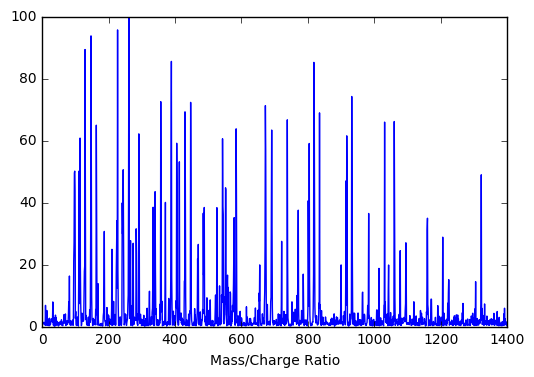

In [54]:
import numpy
import matplotlib.pyplot as plot
%matplotlib inline
import random

random.seed(2018)

hist = numpy.random.wald(1, 1, size=1400)
for weight, frag in fragList:
    hist[weight] += 50*random.random()
    hist[weight+1] += 30*random.random()
    hist[weight-1] += 5*random.random()
    hist[weight+2] += 5*random.random()
    hist[weight-2] += 5*random.random()
    hist[weight-17] += 20*random.random()
    hist[weight-18] += 10*random.random()

plot.plot(range(len(hist)), 100.0*hist/hist.max())
plot.ylim([0,100])
result = plot.xlabel("Mass/Charge Ratio")

In [25]:
(numpy.random.random((10,))*5).astype('int')

array([1, 3, 4, 4, 3, 3, 3, 3, 4, 1])

<p style="text-align: right; clear: right; margin-right: 100px;">10</p>

# Let's try a smaller example

In [8]:
peptide = 'PLAY'
spectrum = TheoreticalSpectrum(peptide)
print len(spectrum), spectrum

fragList = []
for fragLength in xrange(1,len(peptide)+1):
    for start in xrange(0,len(peptide)-fragLength+1):
        seq = peptide[start:start+fragLength]
        fragList.append((sum([Daltons[res] for res in seq]), seq))

print len(fragList)
N = 0
lastWeight = 0
for weight, frag in sorted(fragList):
    print "%12s: %4d%s" % (frag, weight, "*" if (weight == lastWeight) else " "),
    N += 1
    if (N % 5 == 0):
        print
    lastWeight = weight

10 [71, 97, 113, 163, 184, 210, 234, 281, 347, 444]
10
           A:   71             P:   97             L:  113             Y:  163            LA:  184 
          PL:  210            AY:  234           PLA:  281           LAY:  347          PLAY:  444 



<p style="text-align: right; clear: right; margin-right: 100px;">11</p>

# Can we Invert the Process of creating a Spectrum?

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Reverse.png" width="350px" style="float: right; clear: right; margin: 24px;">

* In essence, the problem of inferring a peptide chain from the set of mass values reported by a Mass Spectrometer is the inverse of the code we just wrote

<div style="margin: 20px 80px 0px 80px; font-size: 120%;">
<b>Easy Problem:</b> Peptide Sequence &rarr; Spectrum<br>
<b>Hard Problem:</b> Peptide Sequence &larr; Spectrum
</div>

* Why is computing a spectrum from a peptide sequence easy? $O(N^2)$?
* Why is computing a peptide sequence from a specturm hard? $O(?)$


<p style="text-align: right; clear: right; margin-right: 100px;">12</p>

# How might you approach this problem?

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/BruteForce.jpg" width="200px" style="float: right; clear: right; margin: 24px;">

* Can you think of a Brute-Force way of solving this problem?

* Here's one:
  1. For every peptide sequence with the target peptide's molecular weight
  2.    Compute the sequence's Theoretical Spectrum
  3.    If it matches the one given, report this peptide as a possible solution


* Which step in this algorithm is the hard part?

<p style="text-align: right; clear: right; margin-right: 100px;">13</p>

# A Brute-Force Attempt

In [56]:
def PossiblePeptide(spectrum, prefix=''):
    """ Brute force method of generating all peptide sequences with a desired weight, the max of a given spectrum """
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)  # our target
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.iterkeys():
            PossiblePeptide(spectrum, prefix+residue)

def TestPeptides(candidateList, target):
    filteredList = []
    for peptide in candidateList:
        candidateSpectrum = TheoreticalSpectrum(peptide)
        if (candidateSpectrum == target):
            filteredList.append(peptide)
    return filteredList

spectrum = TheoreticalSpectrum('PLAY')
%time PossiblePeptide(spectrum)
print len(peptideList), "candidates", "PLAY" in peptideList
%time matches = TestPeptides(peptideList, spectrum)
print matches, "PLAY" in matches

CPU times: user 3.63 s, sys: 20 ms, total: 3.65 s
Wall time: 3.63 s
3687 candidates True
CPU times: user 68 ms, sys: 0 ns, total: 68 ms
Wall time: 68.6 ms
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


<p style="text-align: right; clear: right; margin-right: 100px;">14</p>

# Impressions?

* Not so bad for a first attempt, but how will it perform for longer peptides?
* We are getting the expected answer as well as answers with the indistinguishable amino acids substituted
* We are also getting the sequence reversed? Is this a surprise?
* We could code around this, but for today we'll just include the reversed peptide chain as a possible answer
<br><br><br>
# Could we do better?
* The brute force method does not make good use of the spectrum it is given
* It only ever considers the largest value from this table
* How might we make use of the other values?

<p style="text-align: right; clear: right; margin-right: 100px;">15</p>

# Improving on Brute Force

* We could extend our prefix using *only* residues that appear in our spectrum
* The weight of every new prefix that we consider should also be in our spectrum

Actual fragments: <code>P L A Y PL LA AY PLA LAY PLAY</code>

Growing and Checking prefixes:

       A             I             L             P             Y
       
       AI   = LA     IA   = LA     LA   = LA     PI   = PL     YA   = AY
       AIP  = PLA    IAP  = PLA    LAP  = PLA    PIA  = PLA    YAI  = LAY
       AIPY = PLAY   IAPY = PLAY   LAPY = PLAY   PIAY = PLAY   YAIP = PLAY
       AIY  = LAY    IAY  = LAY    LAY  = LAY                  YAL  = LAY
       AIYP = PLAY   IAYP = PLAY   LAYP = PLAY                 YALP = PLAY
       
       AL   = LA     IP   = PL     LP   = PL     PL   = PL
       ALP  = PLA    IPA  = PLA    LPA  = PLA    PLA  = PLA
       ALPY = PLAY   IPAY = PLAY   LPAY = PLAY   PLAY = PLAY
       ALY  = LAY
       ALYP = PLAY
       
       AY   = AY
       AYI  = LAY
       AYIP = PLAY
       AYL  = LAY
       AYLP = PLAY

<p style="text-align: right; clear: right; margin-right: 100px;">16</p>

# Only a Small Change to the Code

In [57]:
def ImprovedPossiblePeptide(spectrum, prefix=''):
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.iterkeys():
            # make sure that this residue appears in our spectrum
            if (Daltons[residue] not in spectrum):
                continue
            # make sure that adding this residue to the sequence we have so far appears in our spectrum
            extend = prefix + residue
            if (sum([Daltons[res] for res in extend]) not in spectrum):
                continue
            ImprovedPossiblePeptide(spectrum, extend)

spectrum = TheoreticalSpectrum('PLAY')
%time ImprovedPossiblePeptide(spectrum)
print len(peptideList), "PLAY" in peptideList
print peptideList
%time matches = TestPeptides(peptideList, spectrum)
print matches, "PLAY" in matches

CPU times: user 0 ns, sys: 1 ms, total: 1 ms
Wall time: 1.15 ms
16 True
['AIPY', 'AIYP', 'ALPY', 'ALYP', 'AYIP', 'AYLP', 'IAPY', 'IAYP', 'IPAY', 'LAPY', 'LAYP', 'LPAY', 'PIAY', 'PLAY', 'YAIP', 'YALP']
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 516 µs
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


<p style="text-align: right; clear: right; margin-right: 100px;">17</p>

# Impact of a small change
* Provides a HUGE performace difference
* Yet another example of Branch-and-Bound
* We improved both the enumeration and verification phases, but the difference was much more significant in the enumeration step

In [11]:
for peptide in peptideList:
    print peptide,

AIPY AIYP ALPY ALYP AYIP AYLP IAPY IAYP IPAY LAPY LAYP LPAY PIAY PLAY YAIP YALP


In [12]:
TheoreticalSpectrum('PLAY')

[71, 97, 113, 163, 184, 210, 234, 281, 347, 444]

In [13]:
TheoreticalSpectrum('LAPY')

[71, 97, 113, 163, 168, 184, 260, 281, 331, 444]

In [58]:
print sum([Daltons[res] for res in 'AP'])  # Suffix of 'LAP' prefix
print sum([Daltons[res] for res in 'APY']) # Suffix of 'LAPY'
print sum([Daltons[res] for res in 'PY'])  # Suffix of 'LAPY'

168
331
260


* There are still differences in the spectrums, yet every prefix was in the spectrum when we added it. What are we missing?
* Suffixes!

<p style="text-align: right; clear: right; margin-right: 100px;">18</p>

# We can do Even Better

* All *suffixes* of each prefix that we consider should also be in our spectrum

In [59]:
def UltimatePossiblePeptide(spectrum, prefix=''):
    global peptideList
    if (len(prefix) == 0):
        peptideList = []
    current = sum([Daltons[res] for res in prefix])
    target = max(spectrum)
    if (current == target):
        peptideList.append(prefix)
    elif (current < target):
        for residue in Daltons.iterkeys():
            extend = prefix + residue
            # test every new suffix created by adding this new reside
            # Note: this includes the residue itself as the length 1 suffix
            suffix = [extend[i:] for i in xrange(len(extend))]
            for fragment in suffix:
                if (sum([Daltons[res] for res in fragment]) not in spectrum):
                    break
            else:
                UltimatePossiblePeptide(spectrum, extend)

spectrum = TheoreticalSpectrum('PLAY')
%time UltimatePossiblePeptide(spectrum)
print len(peptideList), peptideList, "PLAY" in peptideList
%time matches = TestPeptides(peptideList, spectrum)
print matches, "PLAY" in matches

CPU times: user 3 ms, sys: 2 ms, total: 5 ms
Wall time: 3.48 ms
4 ['PIAY', 'PLAY', 'YAIP', 'YALP'] True
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 263 µs
['PIAY', 'PLAY', 'YAIP', 'YALP'] True


<ul style="margin-left: 500px;">
<li>A little slower, but our list is pruned significantly</li>
<li>All of theses have identical spectrums</li>
</ul>

<p style="text-align: right; clear: right; margin-right: 100px;">19</p>

# Now let's return to our *real* peptide

In [60]:
spectrum = TheoreticalSpectrum(TyrocidineB1)
%time UltimatePossiblePeptide(spectrum)
print len(peptideList)
print TyrocidineB1 in peptideList
%time matches = TestPeptides(peptideList, spectrum)
print len(matches)
print TyrocidineB1 in matches

CPU times: user 64 ms, sys: 11 ms, total: 75 ms
Wall time: 58.2 ms
16
True
CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.66 ms
16
True


In [61]:
print TyrocidineB1
for i, peptide in enumerate(peptideList):
    print peptide,
    if (i % 4 == 3):
        print

VKLFPWFNQY
VKIFPWFNKY VKIFPWFNQY VKLFPWFNKY VKLFPWFNQY
VQIFPWFNKY VQIFPWFNQY VQLFPWFNKY VQLFPWFNQY
YKNFWPFIKV YKNFWPFIQV YKNFWPFLKV YKNFWPFLQV
YQNFWPFIKV YQNFWPFIQV YQNFWPFLKV YQNFWPFLQV


All of these peptides give also give us our desired spectrum

<p style="text-align: right; clear: right; margin-right: 100px;">20</p>

# Great, but our assumptions are a little Na&iuml;ve

* In reality, Mass Spectometers don't report the Theoretical Spectrum of a peptide
* Instead they report a measured or *Experimental Spectrum*
* This spectrum might *miss* some fragments
* It might also report *false* fragments
  - From Contaminants
  - New peptides formed by unintended reactions between fragments
* The result is that some of the masses that appear may be misleading, and some that we want might be missing
* We need to develop algorithms for reporting candidate protein sequences that are robust to noise

<p style="text-align: right; clear: right; margin-right: 100px;">21</p>


# Example experimental spectrum for Tyrocidine B1

<pre style="font-size: 100%;">
       97,     99,    113,    <span style="color: blue; font-weight: bold;">114</span>,    128,    147,    163,   
      186,    <span style="color: red; font-weight: bold;">200</span>,    227,    241,    242,    244,    260,   
      261,    283,    291,    333,    340,    357,    <span style="color: blue; font-weight: bold;">388</span>,   
      <span style="color: blue; font-weight: bold;">389</span>,    405,    430,    447,    <span style="color: red; font-weight: bold;">457</span>,    <span style="color: blue; font-weight: bold;">485</span>,    487,   
      543,    544,    552,    575,    577,    584,    <span style="color: red; font-weight: bold;">659</span>,   
      671,    672,    690,    691,    <span style="color: red; font-weight: bold;">731</span>,    738,    770,   
      804,    818,    819,    835,    <span style="color: red; font-weight: bold;">906</span>,    917,    932,   
      982,   1031,   <span style="color: blue; font-weight: bold;">1060</span>,   1095,   1159,   <span style="color: blue; font-weight: bold;">1223</span>,   1322
</pre>

<span style="color: red; font-weight: bold;">False Masses</span>: present in the experimental spectrum, but not in the theoretical spectrum

<span style="color: blue; font-weight: bold;">Missing Masses</span>: present in the theoretical spectrum, but not in the experimental spectrum 


<p style="text-align: right; clear: right; margin-right: 100px;">22</p>

# Example experimental spectrum for Tyrocidine B1

<pre style="font-size: 100%;">
       97,     99,    113,            128,    147,    163,   
      186,    <span style="color: red; font-weight: bold;">200</span>,    227,    241,    242,    244,    260,   
      261,    283,    291,    333,    340,    357,           
              405,    430,    447,    <span style="color: red; font-weight: bold;">457</span>,            487,   
      543,    544,    552,    575,    577,    584,    <span style="color: red; font-weight: bold;">659</span>,   
      671,    672,    690,    691,    <span style="color: red; font-weight: bold;">731</span>,    738,    770,   
      804,    818,    819,    835,    <span style="color: red; font-weight: bold;">906</span>,    917,    932,   
      982,   1031,           1095,   1159,           1322
</pre>

<span style="color: red; font-weight: bold;">False Masses</span>: We don't know which these are

<span style="color: blue; font-weight: bold;">Missing Masses</span>: And these values don't appear


<p style="text-align: right; clear: right; margin-right: 100px;">23</p>

# An aside: Faking an Experimental Spectrum

In [62]:
# generate a synthetic experimental spectrum with 10% Error
import itertools
import random
random.seed(1961)

spectrum = TheoreticalSpectrum(TyrocidineB1)

# Pick around ~10% at random to remove
missingMass = random.sample(spectrum[:-1], 6)  # keep largest mass
print "Missing Masses = ", missingMass

# Add back another ~10% of false, but actual, peptide masses
falseMass = []
for i in xrange(5):
    fragment = ''.join(random.sample(Daltons.keys(), random.randint(2,len(TyrocidineB1)-2)))
    weight = sum([Daltons[residue] for residue in fragment])
    falseMass.append(weight)
print "False Masses = ", falseMass

experimentalSpectrum = sorted(set([mass for mass in spectrum if mass not in missingMass] + falseMass))

Missing Masses =  [1159, 114, 691, 186, 819, 357]
False Masses =  [457, 200, 731, 906, 659]


In [63]:
print experimentalSpectrum

[97, 99, 113, 128, 147, 163, 200, 227, 241, 242, 244, 260, 261, 283, 291, 333, 340, 388, 389, 405, 430, 447, 457, 485, 487, 543, 544, 552, 575, 577, 584, 659, 671, 672, 690, 731, 738, 770, 804, 818, 835, 906, 917, 932, 982, 1031, 1060, 1095, 1223, 1322]



<p style="text-align: right; clear: right; margin-right: 100px;">24</p>

# A Golf Tournament Analogy

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Leaderboard.png" width="300px" style="float: right; clear: right; margin: 24px;">
* After the first couple of rounds of a major golf tournament a *cut* is made of all golfers who are so far back from the leader that it is deemed they are unlikely to ever finish in the money
* These *cut* golfers are removed from further consideration
* This choice is *heuristic*
  - It is possible that a player just below the cut could have two exceptional rounds, but that is considered unlikely
* What is the equivalent of a score in our peptide finding problem?
  - The number of matching masses in the candidate peptide's Theoretical Spectrum and the Experimental Spectrum
  - Normalized score, why?
  - len(intersection of candidate and experimental spectrums) / len(union of candidate and experimental spectrums)
  - ***Jaccard Index*** for sets
* In our peptide *golf game* a round will be considered a one peptide extension of a active set of *player* peptides 
* We will do cuts on every round, keeping to top 5% of finishers or the top 5 players, which ever is more
* Why 5%? It is arbitrary, but on each round we will extend the current set of players by one of 20 amino acids, thus increasing the number of peptides by a factor of 20, so reducing by 5% leaves the poolsize realtively stable.


<p style="text-align: right; clear: right; margin-right: 100px;">25</p>

# An Implementation

In [64]:
def LeaderboardFindPeptide(noisySpectrum, cutThreshold=0.05):
    # Golf Tournament Heuristic
    spectrum = set(noisySpectrum)
    target = max(noisySpectrum)
    players = [''.join(peptide) for peptide in itertools.product(Daltons.keys(), repeat=2)]
    round = 1
    currentLeader = [0.0, '']
    while True:
        print "%8d Players in round %d [%5.4f]" % (len(players), round, currentLeader[0])
        leaderboard = []
        for prefix in players:
            testSpectrum = set(TheoreticalSpectrum(prefix))
            totalWeight = max(testSpectrum)
            score = len(spectrum & testSpectrum)/float(len(spectrum | testSpectrum))
            if (score > currentLeader[0]):
                currentLeader = [score, prefix]
            elif (score == currentLeader[0]):
                currentLeader += [prefix]
            if (totalWeight < target):
                leaderboard.append((score, prefix))
        remaining = len(leaderboard)
        if (remaining == 0):
            print "Done, no sequences can be extended"
            break
        leaderboard.sort(reverse=True)
        # Prune the larger of the top 5% or the top 5 players
        cut = leaderboard[max(min(5,remaining-1),int(remaining*cutThreshold))][0]
        players = [p+r for s, p in leaderboard if s >= cut for r in Daltons.iterkeys()]
        round += 1
    return currentLeader

spectrum = TheoreticalSpectrum(TyrocidineB1)
experimentalSpectrum = [mass for mass in spectrum if mass not in missingMass] + falseMass
%time winners = LeaderboardFindPeptide(experimentalSpectrum)
print winners
print len(winners) - 1, "Candidate residues with", winners[0], 'matches'
print TyrocidineB1, TyrocidineB1 in winners

     400 Players in round 1 [0.0000]
     480 Players in round 2 [0.0600]
    1280 Players in round 3 [0.1200]
    1560 Players in round 4 [0.2000]
    2000 Players in round 5 [0.2745]
    2600 Players in round 6 [0.3654]
    3320 Players in round 7 [0.4615]
    3520 Players in round 8 [0.5556]
    3840 Players in round 9 [0.6545]
    2400 Players in round 10 [0.8036]
     160 Players in round 11 [0.8036]
Done, no sequences can be extended
CPU times: user 1.68 s, sys: 29 ms, total: 1.71 s
Wall time: 1.7 s
[0.8035714285714286, 'YQNFWPFLQV', 'YQNFWPFLKV', 'YQNFWPFIQV', 'YQNFWPFIKV', 'YKNFWPFLQV', 'YKNFWPFLKV', 'YKNFWPFIQV', 'YKNFWPFIKV', 'VQLFPWFNQY', 'VQLFPWFNKY', 'VQIFPWFNQY', 'VQIFPWFNKY', 'VKLFPWFNQY', 'VKLFPWFNKY', 'VKIFPWFNQY', 'VKIFPWFNKY']
16 Candidate residues with 0.803571428571 matches
VKLFPWFNQY True



<p style="text-align: right; clear: right; margin-right: 100px;">26</p>

# Next Time

* This method works well, but it relys on heuristcs, and thus might miss the best answer 
* Our methods are still make a lot of simplfying assumptions
* Relying only exact matches might mislead us 
* We will continue to explore ways of assembling peptide sequences from a given experimental spectrum

<p style="text-align: right; clear: right; margin-right: 100px;">27</p>